# Predicting Earnings from Census Data with Decision Tree
taken from [The Analytics Edge](https://www.edx.org/course/analytics-edge-mitx-15-071x-3)

# The Task

The United States government periodically collects demographic information by conducting a census.

In this problem, we are going to use census information about an individual to predict how much a person earns -- in particular, whether the person earns more than $50,000 per year. This data comes from the UCI Machine Learning Repository.

The file `census.csv` contains 1994 census data for 31,978 individuals in the United States.

The dataset includes the following 13 variables:

- age = the age of the individual in years
- workclass = the classification of the individual's working status (does the person work for the federal government, work for the local government, work without pay, and so on)
-  education = the level of education of the individual (e.g., 5th-6th grade, high school graduate, PhD, so on)
- maritalstatus = the marital status of the individual
- occupation = the type of work the individual does (e.g., administrative/clerical work, farming/fishing, sales and so on)
- relationship = relationship of individual to his/her household
- race = the individual's race
- sex = the individual's sex
- capitalgain = the capital gains of the individual in 1994 (from selling an asset such as a stock or bond for more than the original purchase price)
- capitalloss = the capital losses of the individual in 1994 (from selling an asset such as a stock or bond for less than the original purchase price)
- hoursperweek = the number of hours the individual works per week
- nativecountry = the native country of the individual
- over50k = whether or not the individual earned more than $50,000 in 1994

**Predict whether an individual's earnings are above $50,000 (the variable "over50k") using all of the other variables as independent variables.**

In [1]:
import pandas as pd
import numpy as np

# Exercise 1

1. Read the dataset `census-2.csv`.
2. find out the name and the type of the single colums

In [2]:
# TODO
census = pd.read_csv('../../data/census-2.csv')
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
age              31978 non-null int64
workclass        31978 non-null object
education        31978 non-null object
maritalstatus    31978 non-null object
occupation       31978 non-null object
relationship     31978 non-null object
race             31978 non-null object
sex              31978 non-null object
capitalgain      31978 non-null int64
capitalloss      31978 non-null int64
hoursperweek     31978 non-null int64
nativecountry    31978 non-null object
over50k          31978 non-null object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


# Exercise 2
sklearn classification can only work with numeric values. Therefore we first have to convert all not-numeric values to numeric values.

1. copy the dataframe
2. in the copy: convert the target column `over50k` to a boolean
3. in the copy: convert the not-numeric independent variables (aka features, aka predictors) via `sklearn.LabelEncoder`.

See http://pbpython.com/categorical-encoding.html how to use the `sklearn.LabelEncoder` and for further alternatives to convert not-numeric values to numeric values.

In [3]:
# TODO convert over50k to boolean
census_2 = census.copy()
census_2['over50k']=census_2.over50k==' >50K'
census_2.head()

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,over50k
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,False
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,False
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,False
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,False
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,False


In [4]:
from sklearn.preprocessing import LabelEncoder

not_numeric_columns = ['workclass', 'education', 'maritalstatus', 'occupation',
       'relationship', 'race', 'sex', 'nativecountry']
# TODO
for col in not_numeric_columns:
    le = LabelEncoder()
    census_2[col] = le.fit_transform(census_2[col])
    
census_2.head()

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,over50k
0,39,7,9,4,1,1,4,1,2174,0,40,38,False
1,50,6,9,2,4,0,4,1,0,0,13,38,False
2,38,4,11,0,6,1,4,1,0,0,40,38,False
3,53,4,1,2,6,0,2,1,0,0,40,38,False
4,28,4,9,2,10,5,2,0,0,0,40,4,False


# Exercise 3
Separate target variable `over50k` from the independent variables (all others): 
`over50k -> y, all others -> X`

In [5]:
# TODO (hint: use drop(columns,axis=1))
y = census_2.over50k
X = census_2.drop(['over50k'],axis=1)

# Exercise 4
Then, split the data randomly into a training set and a testing set, setting the `random_state` to 2000 before creating the split. Split the data so that the training set contains 60% of the observations, while the testing set contains 40% of the observations.

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# TODO
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.4, random_state=2000)

In [8]:
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

print (X_train.columns)
print (y_train.name)

(19186, 12)
(19186,)
(12792, 12)
(12792,)
Index(['age', 'workclass', 'education', 'maritalstatus', 'occupation',
       'relationship', 'race', 'sex', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry'],
      dtype='object')
over50k


# Exercise 5
Let us now build a classification tree to predict "over50k". Use the training set to build the model, and all of the other variables as independent variables. Use `max_depth=3` and the default parameters else.

In [9]:
from sklearn.tree import DecisionTreeClassifier

# TODO
clf = DecisionTreeClassifier(max_depth=3).fit(X_train,y_train)

# Exercise 6

Plot the decision tree using `plotting_utilities.plot_decision_tree`
- Which are the most important feature? (Root of the Tree)
- Which is the next important feature? (2nd Level)

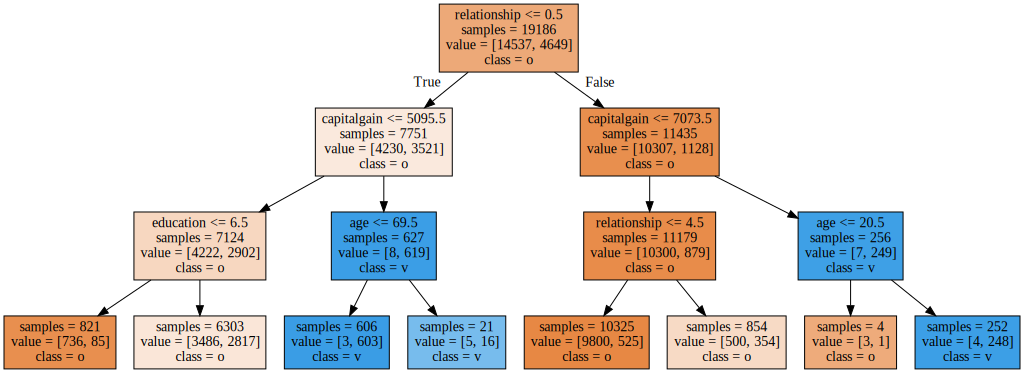

In [10]:
from plotting_utilities import plot_decision_tree, plot_feature_importances
import matplotlib.pyplot as plt

%matplotlib inline
plot_decision_tree(clf, X_train.columns,y_train.name)

# Exercise 7

Plot Top 5 most important features with [plotting_utilities.plot_feature_importances](./plotting_utilities.py).

Are these features also the most important in the Decision Tree?

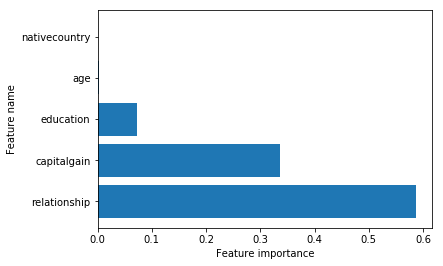

In [11]:
# TODO
#X_train.columns
clf.feature_importances_
#np.argsort(clf.feature_importances_)
plot_feature_importances(clf, X_train.columns, 5)

# Exercise 7
- Predict for the test data and 
- compare with the actual outcome: 
  - Therefore print the confusion matrix for the test-data and 
  - calculate the accuracy
      - for the trainings-data
      - for the test-data

In [12]:
# TODO predict
y_pred = clf.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix

# TODO
print ("-............... Predicted ")
print ("Actuals")
confusion_matrix(y_test,y_pred)

-............... Predicted 
Actuals


array([[9737,    9],
       [2466,  580]])

In [14]:
clf.score(X_train, y_train)

0.80225164182216202

In [15]:
clf.score(X_test, y_test)

0.8065196998123827

In [16]:
accuracy = (9737+580)/((9737+580+2466+9))
accuracy

0.8065196998123827